<h1 align="center">
  Nienadzorowana reprezentacja autoenkodery i modele generatywne
</h1>

<h4 align="center">
  12.10.2023
</h4>
<br/>


# Przekształcanie obrazów

### Importowanie niezbędnych modułow

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import torch
import torchvision
from torchvision import datasets, models, transforms


sns.set(font_scale=2.5)
sns.set_style("whitegrid")

In [2]:
def show(imgs, num_col=None):
    plt.figure(figsize=[16, 8])
    grid = torchvision.utils.make_grid(
        imgs, nrow=num_col, padding=1, normalize=True, scale_each=True
    )
    np_grid = grid.cpu().numpy()
    plt.axis("off")
    plt.imshow(np.transpose(np_grid, (1, 2, 0)), interpolation="nearest")

## Normalizacja
Normalizcja obrazu na podstawie średniej i odchylenia standardowego. 
```
output[channel] = (input[channel] - mean[channel]) / std[channel]
```

In [3]:
root = "../datasets/cifar10"
download = True

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = datasets.CIFAR10(
    root=root, train=True, download=download, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=10, shuffle=True, num_workers=2
)


Extracting ../datasets/cifar10\cifar-10-python.tar.gz to ../datasets/cifar10


torch.Size([10, 3, 32, 32])
tensor(-1.) tensor(1.)


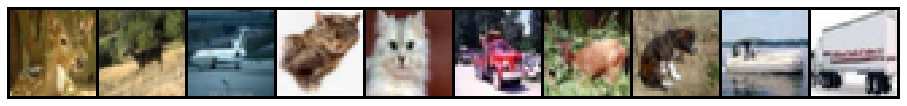

In [4]:
it = iter(train_loader)
d = next(it)
print(d[0].shape)
print(torch.min(d[0]), torch.max(d[0]))

show(d[0], num_col=10)

## Random Horizontal Flip
Losowe odwrócenie w poziomie to prosta technika polegająca na odwróceniu obrazu w poziomie z określonym prawdopodobieństwem. Może to pomóc modelowi nauczyć się tego samego obiektu z różnych punktów widzenia.

Files already downloaded and verified
torch.Size([30, 3, 32, 32])
tensor(0.) tensor(1.)
Files already downloaded and verified


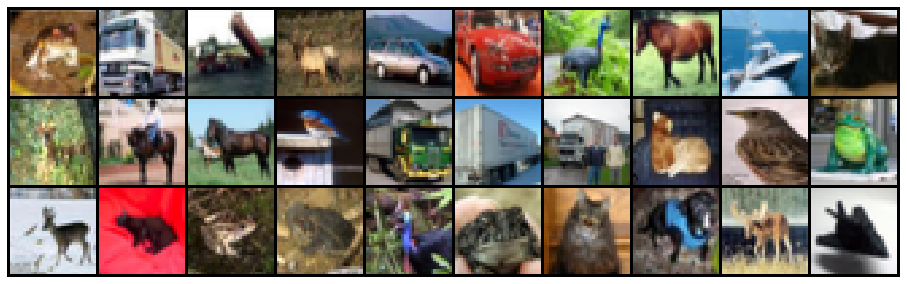

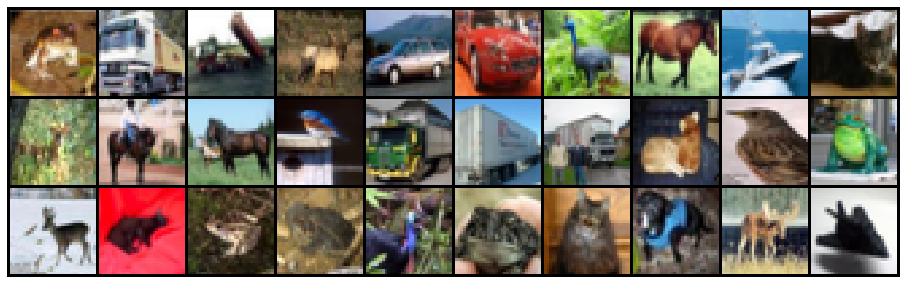

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

trainset = datasets.CIFAR10(
    root=root, train=True, download=download, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=30, shuffle=False, num_workers=2
)

it = iter(train_loader)
d = next(it)
print(d[0].shape)
print(torch.min(d[0]), torch.max(d[0]))

show(d[0], num_col=10)


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.5)
])
trainset = datasets.CIFAR10(
    root=root, train=True, download=download, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=30, shuffle=False, num_workers=2
)

it = iter(train_loader)
d = next(it)
show(d[0], num_col=10)

## Random Rotation
Losowy obrót to technika losowego obracania obrazu o określony kąt. Może to pomóc modelowi nauczyć się tego samego obiektu pod różnymi kątami.

Files already downloaded and verified


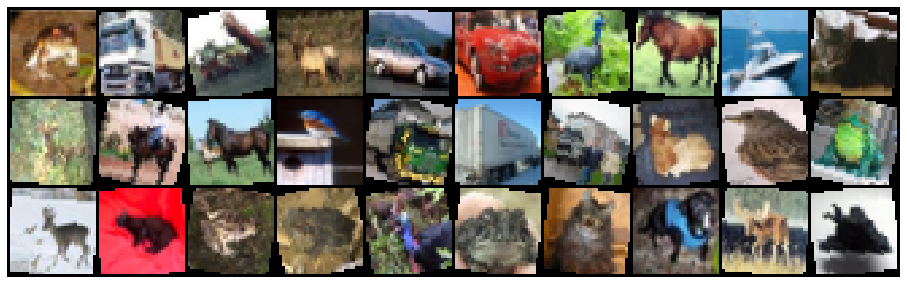

In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(degrees=15)
])
trainset = datasets.CIFAR10(
    root=root, train=True, download=download, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=30, shuffle=False, num_workers=2
)

it = iter(train_loader)
d = next(it)
show(d[0], num_col=10)

## Resize
Zmiana rozmiaru obrazka

Files already downloaded and verified
torch.Size([30, 3, 42, 42])


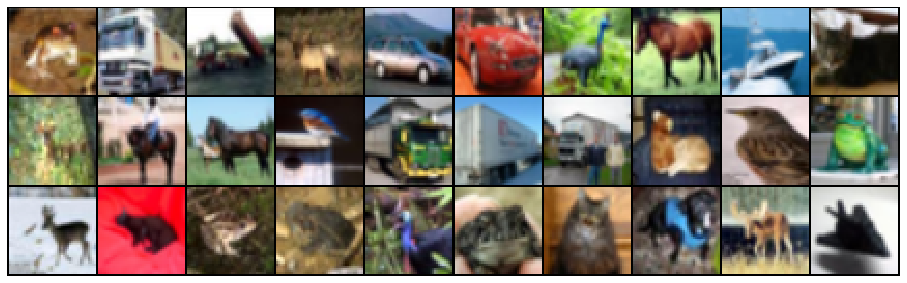

In [7]:
transform = transforms.Compose([
   transforms.Resize(size=42),
    transforms.ToTensor(),
])
trainset = datasets.CIFAR10(
    root=root, train=True, download=download, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=30, shuffle=False, num_workers=2
)

it = iter(train_loader)
d = next(it)
print(d[0].shape)
show(d[0], num_col=10)

## Random Crop
Losowe kadrowanie to technika polegająca na losowym przycinaniu obrazu do określonego rozmiaru. Może to pomóc modelowi nauczyć się skupiać na ważnych częściach obrazu.

Files already downloaded and verified
torch.Size([30, 3, 32, 32])


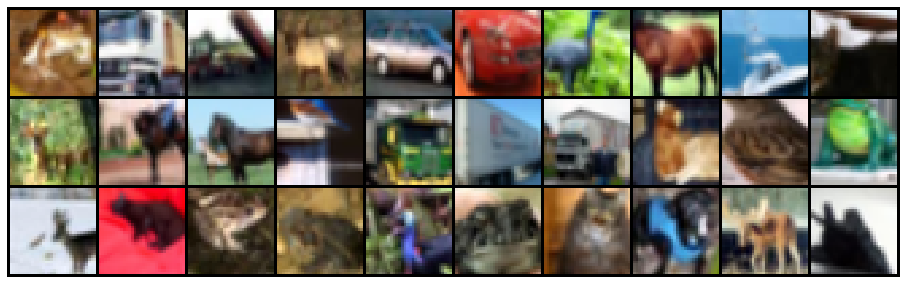

In [8]:
transform = transforms.Compose([
    transforms.Resize(size=42),
    transforms.ToTensor(),
    transforms.RandomCrop(size=32)
])
trainset = datasets.CIFAR10(
    root=root, train=True, download=download, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=30, shuffle=False, num_workers=2
)

it = iter(train_loader)
d = next(it)
print(d[0].shape)
show(d[0], num_col=10)

## Color Jitter
Drgania kolorów to technika losowo zmieniająca jasność, kontrast, nasycenie i odcień obrazu. Może to pomóc modelowi nauczyć się odporności na zmiany w schemacie kolorów.

Files already downloaded and verified
torch.Size([30, 3, 32, 32])
Files already downloaded and verified
torch.Size([30, 3, 32, 32])


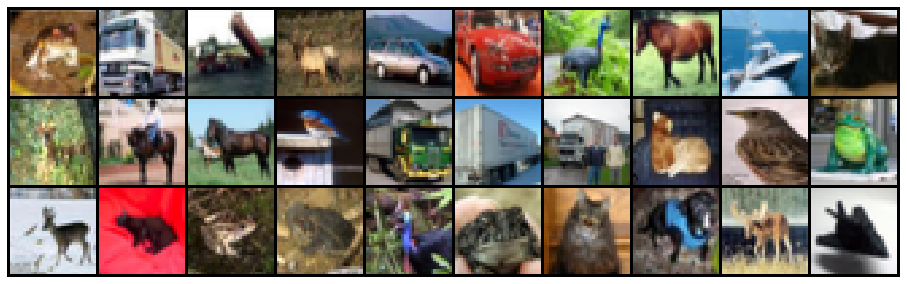

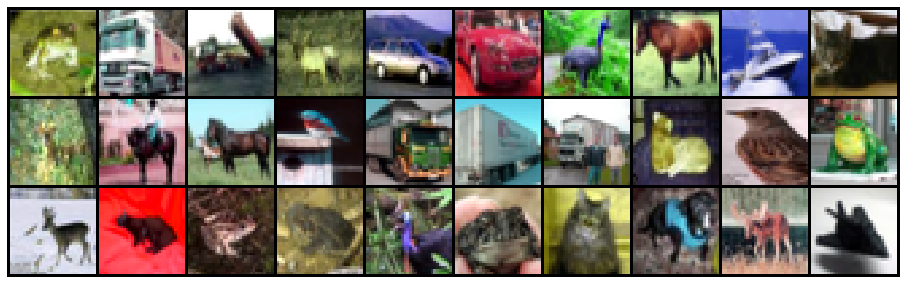

In [9]:
transform = transforms.Compose([
    transforms.ToTensor(),
])
trainset = datasets.CIFAR10(
    root=root, train=True, download=download, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=30, shuffle=False, num_workers=2
)

it = iter(train_loader)
d = next(it)
print(d[0].shape)
show(d[0], num_col=10)


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
])
trainset = datasets.CIFAR10(
    root=root, train=True, download=download, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=30, shuffle=False, num_workers=2
)

it = iter(train_loader)
d = next(it)
print(d[0].shape)
show(d[0], num_col=10)

## Gaussian Blur
Rozmycie gaussowskie to technika polegająca na dodaniu do obrazu losowego szumu gaussowskiego. Może to pomóc modelowi nauczyć się odporności na szumy na obrazie.

Files already downloaded and verified
torch.Size([30, 3, 32, 32])
Files already downloaded and verified
torch.Size([30, 3, 32, 32])


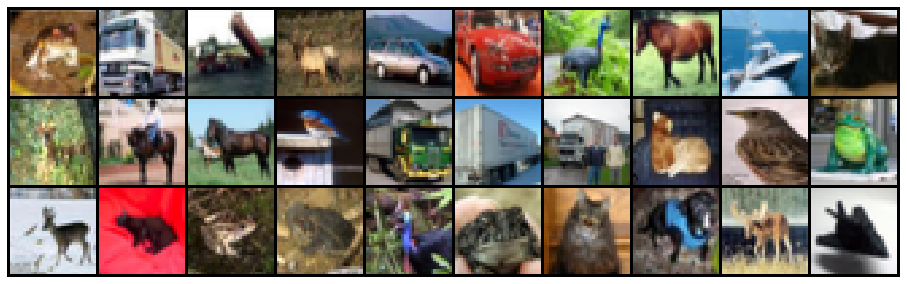

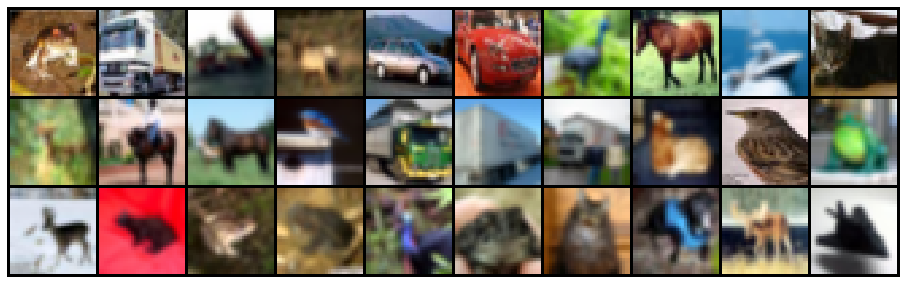

In [10]:
transform = transforms.Compose([
    transforms.ToTensor(),
])
trainset = datasets.CIFAR10(
    root=root, train=True, download=download, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=30, shuffle=False, num_workers=2
)

it = iter(train_loader)
d = next(it)
print(d[0].shape)
show(d[0], num_col=10)


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.GaussianBlur(kernel_size=3),
])
trainset = datasets.CIFAR10(
    root=root, train=True, download=download, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=30, shuffle=False, num_workers=2
)

it = iter(train_loader)
d = next(it)
print(d[0].shape)
show(d[0], num_col=10)

## RandomErasing
Technika powiększania obrazu RandomErasing losowo wybiera prostokątny obszar na oryginalnym obrazie i usuwa wszystkie piksele z tego obszaru. Prawdopodobieństwo lub operację kasowania można kontrolować za pomocą atrybutu „p”, którego wartość waha się od $0 \leq p\leq 1$.

Files already downloaded and verified
torch.Size([30, 3, 32, 32])
Files already downloaded and verified
torch.Size([30, 3, 32, 32])


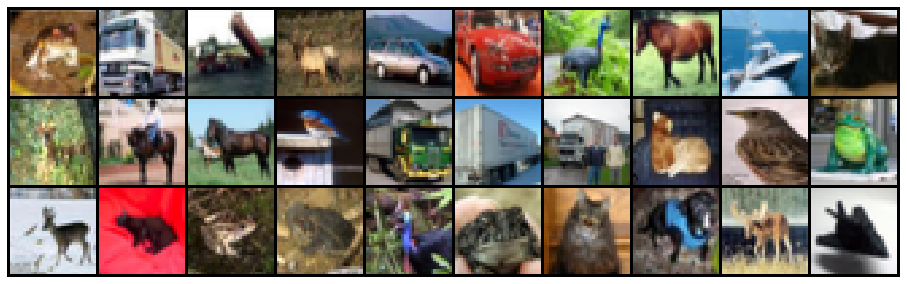

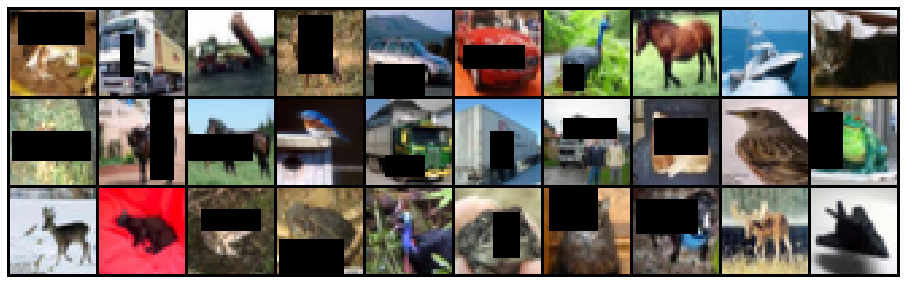

In [11]:
transform = transforms.Compose([
    transforms.ToTensor(),
])
trainset = datasets.CIFAR10(
    root=root, train=True, download=download, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=30, shuffle=False, num_workers=2
)

it = iter(train_loader)
d = next(it)
print(d[0].shape)
show(d[0], num_col=10)


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomErasing(p=.7)
])
trainset = datasets.CIFAR10(
    root=root, train=True, download=download, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=30, shuffle=False, num_workers=2
)

it = iter(train_loader)
d = next(it)
print(d[0].shape)
show(d[0], num_col=10)

Więcej transformacji można znaleźć [tutaj](https://pytorch.org/vision/master/transforms.html).

## Zaszumianie orazów

In [12]:
def denoising(images, noise_factor, min_clip=None, max_clip=None):
    noisy_imgs = images + noise_factor * torch.randn_like(images)
    return torch.clamp(noisy_imgs, min=min_clip, max=max_clip)

Files already downloaded and verified
torch.Size([30, 3, 32, 32])


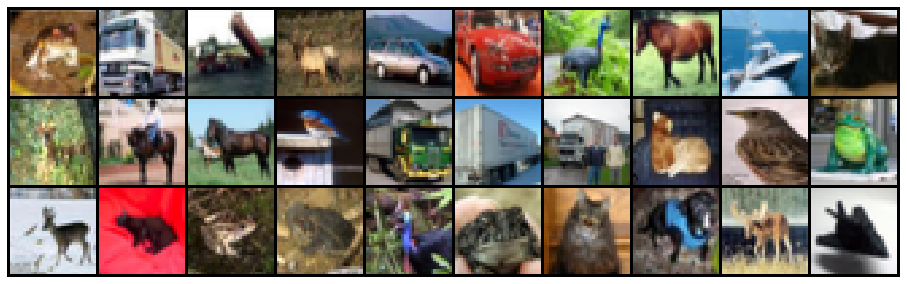

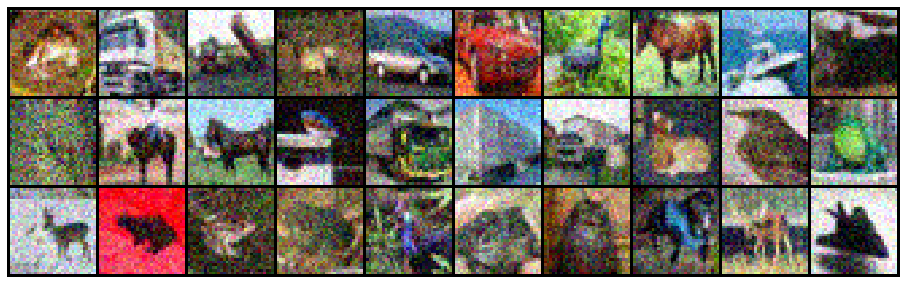

In [13]:
transform = transforms.Compose([
    transforms.ToTensor(),
])
trainset = datasets.CIFAR10(
    root=root, train=True, download=download, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=30, shuffle=False, num_workers=2
)

it = iter(train_loader)
d = next(it)
print(d[0].shape)
show(d[0], num_col=10)

it = iter(train_loader)
d = next(it)
d = denoising(d[0], 0.1, min_clip=0, max_clip=1)
show(d, num_col=10)

# Denoising AE
Używając funkcji zaszumiania obrazów, napisz model ,,denoising AE'' (na wejściu przyjmuje zaszumione dane, a na wyjściu zwraca obrazy bez szumu). Naucz model na zaszumionym zbiorze MNIST i oblicz błąd MSE między oryginalnymi obrazami MNISTa (niezaszumionymi), a rekonstrukcjami zaszumionych obrazów.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

sns.set(font_scale=2.5)
sns.set_style("whitegrid")


class AverageMeter:
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum = self.sum + val * n
        self.count = self.count + n
        self.avg = self.sum / self.count


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def show(img, img_noisy, recon_img, num_col=None):
    if recon_img is None:
        rec_images = img
    else:
        n = img.shape[0]
        assert n >= num_col
        rec_images = torch.empty((3 * num_col, *img.shape[1:]))
        rec_images.data[:num_col] = img.data[:num_col]
        rec_images.data[num_col:2*num_col] = img_noisy.data[:num_col]
        rec_images.data[-num_col:] = recon_img.data[:num_col]

    plt.figure(figsize=[16, 8])
    grid = torchvision.utils.make_grid(
        rec_images, nrow=num_col, padding=1, normalize=True, scale_each=True
    )
    np_grid = grid.cpu().numpy()
    plt.axis("off")
    plt.imshow(np.transpose(np_grid, (1, 2, 0)), interpolation="nearest")

In [15]:
root = "../datasets"
download = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
print(f"{device=}")

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = torchvision.datasets.MNIST(
    root, download=download, train=True, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=False
)

test_dataset = torchvision.datasets.MNIST(
    root, download=download, train=False, transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=200, shuffle=False, num_workers=4, pin_memory=False
)

device=device(type='cpu')


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [16]:
class View(torch.nn.Module):
    def __init__(self, *shape) -> None:
        super(View, self).__init__()
        self.shape = shape

    def forward(self, input_x: torch.Tensor) -> torch.Tensor:
        return input_x.view(*self.shape)


class LambdaLR(torch.optim.lr_scheduler.LambdaLR):
    def __init__(
        self, optimizer, lr_lambda, last_epoch=-1, verbose=False, min_val=1e-5
    ):
        self.min_val = min_val
        self.change = True

        super(LambdaLR, self).__init__(optimizer, lr_lambda, last_epoch, verbose)

    def step(self, epoch=None):
        if self.change:
            super().step(epoch)

            change = False
            values = self.get_last_lr()
            for i, data in enumerate(zip(self.optimizer.param_groups, values)):
                param_group, lr = data
                param_group["lr"] = lr if lr > self.min_val else self.min_val
                self.print_lr(self.verbose, i, lr, epoch)

            self._last_lr = [group["lr"] for group in self.optimizer.param_groups]

In [17]:
from typing import Tuple


class AE(torch.nn.Module):
    def __init__(self, latent_dim: int, dim_hidden: int) -> None:
        super(AE, self).__init__()

        self.latent_dim = latent_dim
        self.dim_h = dim_hidden

        # Encoder
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, self.dim_h, 4, 2, 1, bias=False),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(self.dim_h, self.dim_h * 2, 4, 2, 1, bias=False),
            torch.nn.BatchNorm2d(self.dim_h * 2),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(self.dim_h * 2, self.dim_h * 4, 4, 2, 1, bias=False),
            torch.nn.BatchNorm2d(self.dim_h * 4),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(self.dim_h * 4, self.dim_h * 8, 4, 2, 1, bias=False),
            torch.nn.BatchNorm2d(self.dim_h * 8),
            torch.nn.ReLU(True),
            torch.nn.Flatten(),
            torch.nn.Linear(self.dim_h * (2**3), latent_dim),
        )

        # Decoder
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(latent_dim, self.dim_h * 8 * 7 * 7),
            torch.nn.ReLU(True),
            View(-1, self.dim_h * 8, 7, 7),
            torch.nn.ConvTranspose2d(self.dim_h * 8, self.dim_h * 4, 4),
            torch.nn.BatchNorm2d(self.dim_h * 4),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(self.dim_h * 4, self.dim_h * 2, 4),
            torch.nn.BatchNorm2d(self.dim_h * 2),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(self.dim_h * 2, 1, 4, stride=2),
            torch.nn.Sigmoid(),
        )

    def forward(self, input_x: torch.Tensor) -> Tuple[torch.Tensor]:
        z = self.encoder(input_x)
        return z, self.decoder(z)

In [18]:
latent_dim = 8
dim_hidden = 16

model = AE(latent_dim=latent_dim, dim_hidden=dim_hidden)
model = model.to(device)
print(model)
print(f"Number of parameters: {count_parameters(model)}")

optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

use_scheduler = False
scheduler = None
if use_scheduler:
    scheduler = LambdaLR(optimizer, lr_lambda=lambda epoch: 0.8**epoch, min_val=1e-5)

mse_loss = torch.nn.MSELoss()
scores = {"train": {"loss": []}, "test": {"loss": []}}
noise_factor = 0.4

epochs = 5
for epoch in range(epochs):

    # training
    model.train()

    losses = AverageMeter()

    train_tqdm = tqdm(train_loader, total=len(train_loader), leave=False)
    for image, _ in train_tqdm:
        image = image.to(device)
        
        noisy_imgs = denoising(image, noise_factor, min_clip=0, max_clip=1)
        _, recon = model(noisy_imgs)
        loss = mse_loss(recon, image)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.update(loss.item())

        train_tqdm.set_description(f"TRAIN loss: {losses.val:.4g} ({losses.avg:.4g})")

    scores["train"]["loss"].append(losses.avg)
    if use_scheduler:
        scheduler.step()

    # validating
    model.eval()

    losses = AverageMeter()

    with torch.no_grad():
        eval_tqdm = tqdm(test_loader, total=len(test_loader), leave=False)
        for image, _ in eval_tqdm:
            image = image.to(device)

            noisy_imgs = denoising(image, noise_factor, min_clip=0, max_clip=1)
            _, recon = model(noisy_imgs)
            loss = mse_loss(recon, image)

            losses.update(loss.item())

            eval_tqdm.set_description(f"TEST loss: {losses.val:.4g} ({losses.avg:.4g})")

    scores["test"]["loss"].append(losses.avg)

    print(
        f"Epoch: [{epoch + 1}/{epochs}]; "
        f"train: {scores['train']['loss'][-1]:.4g}; "
        f"test: {scores['test']['loss'][-1]:.4f}"
        f"{f'; lr: {scheduler.get_last_lr()[0]:.4g}' if use_scheduler else ''}"
    )

AE(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU(inplace=True)
    (2): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU(inplace=True)
    (8): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Flatten(start_dim=1, end_dim=-1)
    (12): Linear(in_features=128, out_features=8, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=8, out_features=6272, bias=True)
    (1): ReLU(inplace=True)
    (2): View()
    

Epoch: [1/5]; train: 0.03142; test: 0.0214


Epoch: [2/5]; train: 0.02115; test: 0.0192


Epoch: [3/5]; train: 0.01966; test: 0.0181


Epoch: [4/5]; train: 0.01878; test: 0.0179


Epoch: [5/5]; train: 0.01827; test: 0.0175


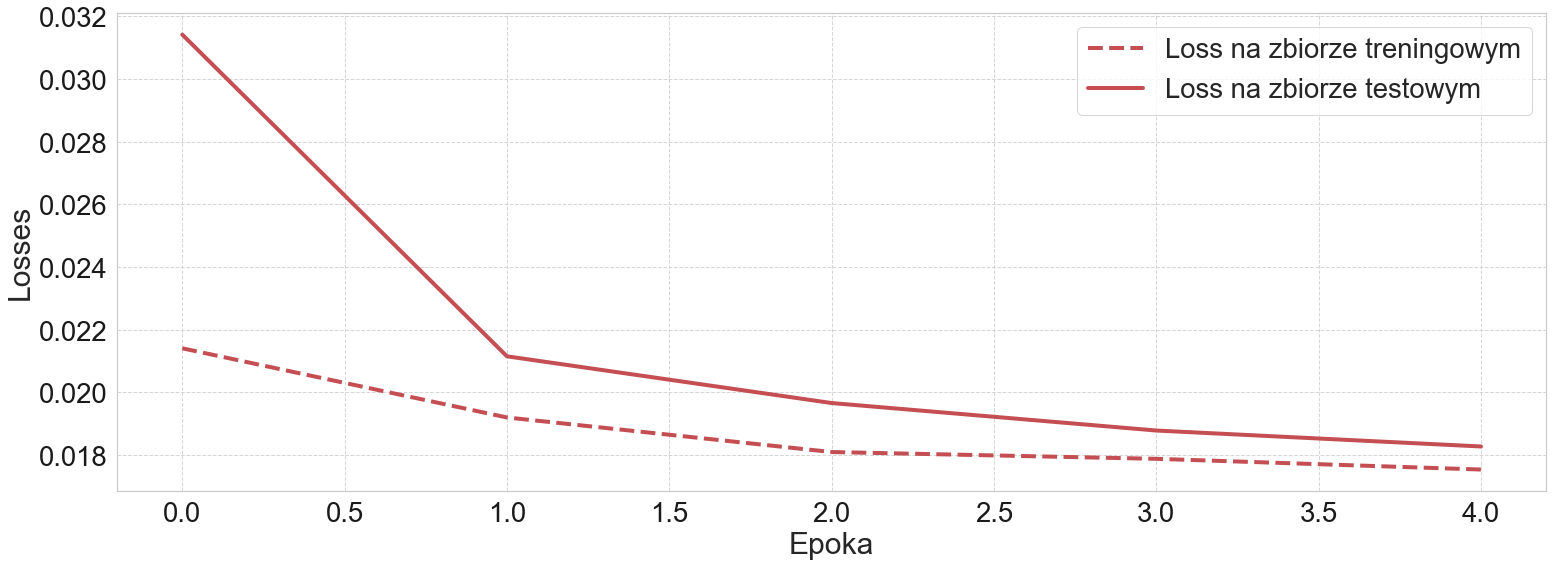

In [19]:
# loss
fig = plt.figure(figsize=(22, 8))
ax = fig.add_subplot(111)
ax.plot(
    scores["test"]["loss"],
    "r--",
    linewidth=4,
    markersize=12,
    label="Loss na zbiorze treningowym",
)
ax.plot(
    scores["train"]["loss"],
    "r-",
    linewidth=4,
    markersize=12,
    label="Loss na zbiorze testowym",
)
ax.tick_params(
    axis="both",
    which="both",
    direction="out",
    length=6,
    width=2,
    colors="k",
    grid_alpha=0.5,
)
ax.grid(which="both")
ax.grid(which="major", color="#CCCCCC", linestyle="--", alpha=0.8)
ax.grid(which="minor", color="#CCCCCC", linestyle=":", alpha=0.8)

ax.legend(loc=0)
ax.set_ylabel("Losses")
ax.set_xlabel("Epoka")
plt.tight_layout(pad=0.5)

plt.show()
plt.close()

Ewaluation MSE: 0.01752


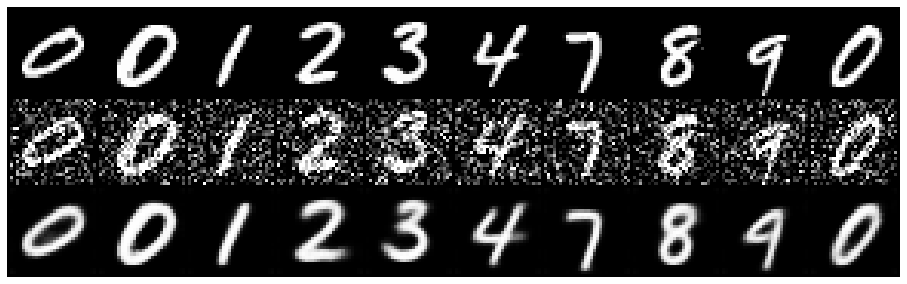

In [20]:
# validating
model.eval()

mses = AverageMeter()

with torch.no_grad():
    eval_tqdm = tqdm(enumerate(test_loader), total=len(test_loader), leave=False)
    for i, (image, _) in eval_tqdm:
        image = image.to(device)
        
        noisy_imgs = denoising(image, noise_factor, min_clip=0, max_clip=1)
        _, recon = model(noisy_imgs)
        loss = mse_loss(recon, image)

        mses.update(loss.item())

        eval_tqdm.set_description(f"mse: {mses.val:.4g} ({mses.avg:.4g})")

        if i == len(test_loader) - 1:
            show(image, noisy_imgs, recon, 10)

print(f"Ewaluation MSE: {mses.avg:.4g}")